## 1. TMB Calculator

In [1]:
setwd("/Users/jacobbradley/Documents/CCG/Code")

### Packages

In [2]:
install.packages("tidyverse")
library(tidyverse)
# Data Handling packages

if (!requireNamespace("BiocManager"))
    install.packages("BiocManager")
BiocManager::install()
library(BiocManager)
# Bioinformatics packages


The downloaded binary packages are in
	/var/folders/g9/9x6m35fn5ydf88vdlm9n1vg80000gn/T//RtmpPExrE1/downloaded_packages


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required namespace: BiocManager
Bioconductor version 3.8 (BiocManager 1.30.3), R 3.5.1 (2018-07-02)
Update old packages: 'AnnotationHub', 'backports', 'BiocManager',
  'BiocParallel', 'Biostrings', 'biovizBase', 'broom', 'callr', 'circlize',
  'class', 'clusterProfiler', 'codetools', 'DESeq', 'EDASeq', 'edgeR', 'ELMER',
  'ensembldb', 'foreign', 'gdsfmt', 'GenomicAlignments', 'gganimate', 'ggpubr',
  'grImport', 'Gviz', 'haven', 'htmlTable', 'httpuv', 'httr', 'IRdisplay',
  'jsonlite', 'knitr', 'lattice', 'limma', 'markdown', 'MASS', 'Matrix',
  'mclust', 'mgcv', 'openssl', 'pathview', 'pillar', 'proce

In [3]:
source("TMB_Funcs.txt")
# My Stuff!

In [4]:
path_name <- "/Volumes/CCG8/processed_data"

### Looking at TMB across studies for breast cancer

In [5]:
breast_data <- cbio_getData(path_name, cancer_type = "brca", test = FALSE)

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "brca_bccrc"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double()
  # ... with 3 more columns
)
See spec(...) for full column specifications.


[1] 65


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_bccrc_xenograft_2014"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  `MA:FIS` = col_double()
)
See spec(...) for full column specifications.


[1] 116


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_broad"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  n_depth = col_integer(),
  HGNC_ID = col_integer(),
  ExAC_AF_AMR = col_double(),
  t_depth = col_integer(),
  DISTANCE = col_integer(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  HGVS_OFFSET = col_integer(),
  ExAC_AF = col_double()
  # ... with 2 more columns
)
See spec(...) for full column specifications.


[1] 103


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_igr_2015"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  Freq_Variant_Allele_Normal = col_double(),
  Freq_Variant_Allele_Tumor = col_double()
)
See spec(...) for full column specifications.


[1] 211


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_mbcproject_wagle_2017"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  NCBI_Build = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Transcript_Exon = col_integer(),
  Transcript_Position = col_integer(),
  UniProt_AApos = col_integer(),
  COSMIC_total_alterations_in_gene = col_integer(),
  gc_content = col_double(),
  CCLE_ONCOMAP_total_mutations_in_gene = col_integer(),
  i_1000gp3_AC = col_integer(),
  i_1000gp3_AF = col_double(),
  i_1000gp3_AFR_AF = col_double(),
  i_1000gp3_AMR_AF = col_double(),
  i_1000gp3_AN = col_integer(),
  i_1000gp3_DP = col_integer(),
  i_1000gp3_EAS_AF = col_double(),
  i_1000gp3_EUR_AF = col_double(),
  i_1000gp3_NS = col_integer(),
  i_1000gp3_SAS_AF = col_double()
  # ... with 60 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“1385 pa

[1] 156


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_metabric"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 2355


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_sanger"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 100


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_tcga"


Warning message:
“Missing column names filled in: 'X54' [54]”Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Score = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  stop_WU = col_integer(),
  X54 = col_double(),
  tumor_vaf = col_double(),
  normal_ref_reads = col_integer(),
  start_WU = col_integer(),
  strand_WU = col_integer(),
  tumors_var_reads = col_integer(),
  normal_vaf = col_double(),
  tumor_ref_reads = col_integer(),
  normal_var_reads = col_integer()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“3282 parsing failures.
row # A tibble: 5 x 5 col     row col     expected  actual file                                         

[1] 981


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 1009


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_tcga_pub"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Score = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  n_depth = col_integer(),
  HGNC_ID = col_integer(),
  ExAC_AF_AMR = col_double(),
  t_depth = col_integer(),
  `MA:FIS` = col_double(),
  DISTANCE = col_integer(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_NFE = col_double(),
  stop_wu = col_integer(),
  stop_WU = col_integer()
  # ... with 11 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“42 parsing failures.
row # A tibble: 5 x 5 col     row col      expected        actual file                                    expect

[1] 507


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_tcga_pub2015"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  AA_MAF = col_double(),
  ASN_MAF = col_double(),
  AFR_MAF = col_double(),
  EA_MAF = col_double(),
  PUBMED = col_integer()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“30 parsing failures.
row # A tibble: 5 x 5 col     row col    expected      actual                file                         expected   <int> <chr>  <chr>         <chr>                 <chr>                        actual 1  4642 PUBMED no trailing … ,132,864,314,508,700  '/Volumes/CCG8/processed_

[1] 816


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 4194


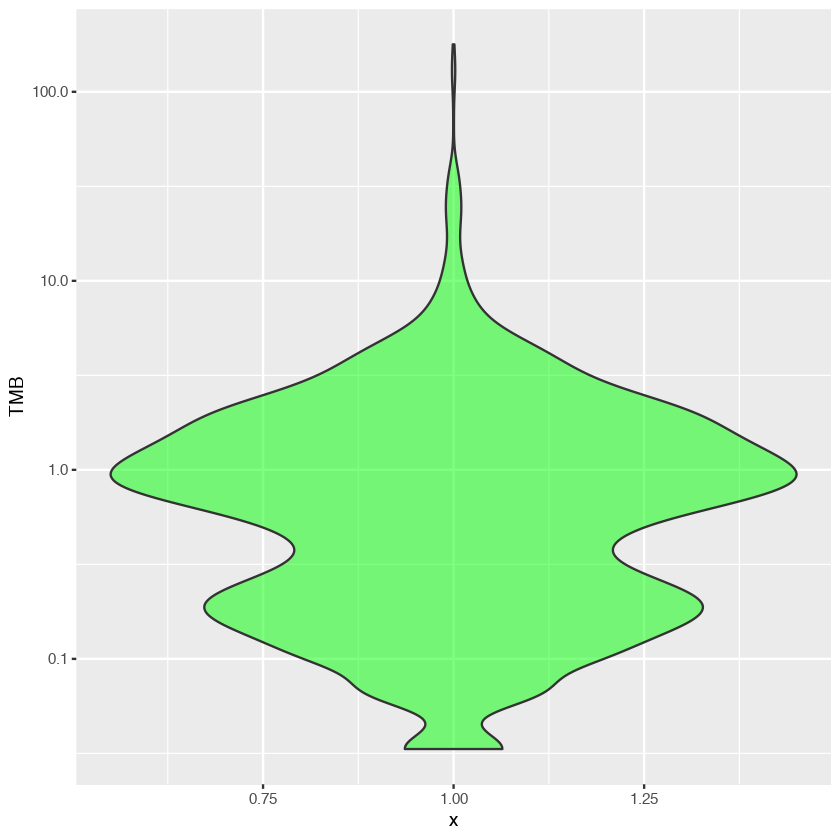

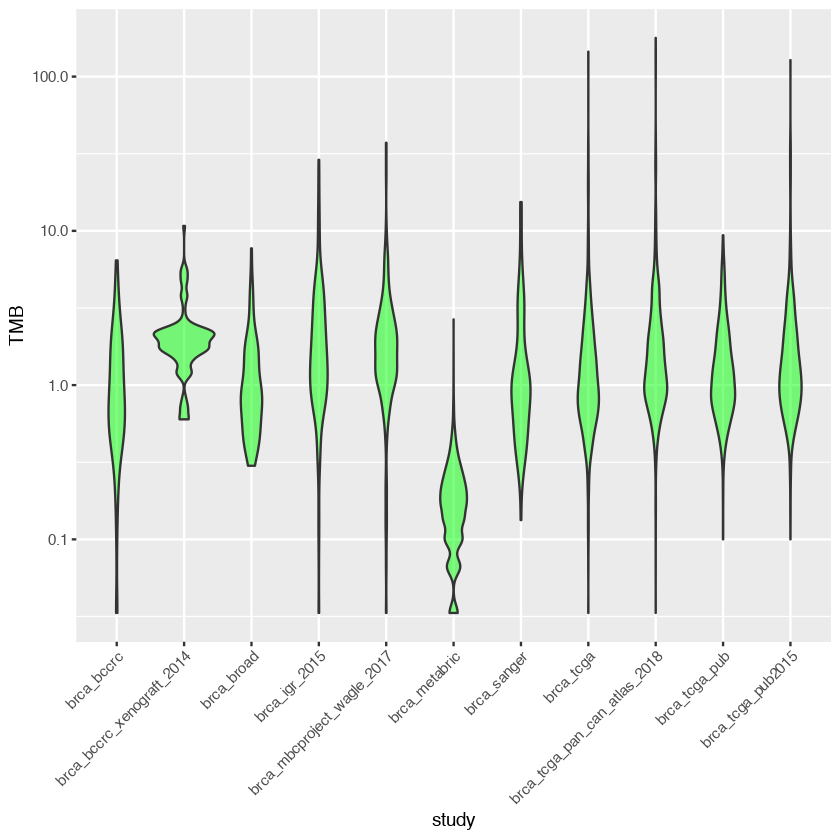

In [6]:
breast_data %>% 
    TMB_Calc() %>% 
    ggplot(aes(x = 1, y = TMB)) + geom_violin(alpha = 0.5, fill = "green") + 
    scale_y_log10() 

breast_data %>% 
    TMB_Calc() %>% 
    ggplot(aes(x = study, y = TMB)) + geom_violin(alpha = 0.5, fill = "green") + 
    scale_y_log10() + theme(axis.text.x = element_text(angle = 45, hjust = 1))


###  Find CBioPortal Studies With Mutations Data

In [7]:
breast_data_sets <- cbio_getDataSets(path_name, "brca")

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "Their is no mutations file in archived_files"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "Their is no mutations file in brafresist"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "Their is no mutations file in case_lists"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "Their is no mutations file in prad_mskcc_2014"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "Their is no mutations file in sarc_mskcc"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

In [8]:
breast_data_sets

[1] "brca_bccrc"                   "brca_bccrc_xenograft_2014"   
 [3] "brca_broad"                   "brca_igr_2015"               
 [5] "brca_mbcproject_wagle_2017"   "brca_metabric"               
 [7] "brca_sanger"                  "brca_tcga"                   
 [9] "brca_tcga_pan_can_atlas_2018" "brca_tcga_pub"               
[11] "brca_tcga_pub2015"

In [9]:
cancer_types <- cbio_getCancerTypes(path_name)

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "Their is no mutations file in archived_files"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "Their is no mutations file in brafresist"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "Their is no mutations file in case_lists"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "Their is no mutations file in prad_mskcc_2014"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "Their is no mutations file in sarc_mskcc"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

In [10]:
cancer_types

[1] "acbc"        "acc"         "acyc"        "bll"         "mixed"      
 [6] "aml"         "ampca"       "angs"        "bfn"         "blca"       
[11] "brca"        "breast"      "ccrcc"       "cesc"        "chol"       
[16] "cllsll"      "coad"        "coadread"    "cscc"        "nhl"        
[21] "desm"        "dlbcl"       "dlbclnos"    "egc"         "es"         
[26] "esca"        "escc"        "gbc"         "gbm"         "gct"        
[31] "hcc"         "hnsc"        "chrcc"       "prcc"        "difg"       
[36] "liad"        "luad"        "lusc"        "mbl"         "mcl"        
[41] "mds"         "mel"         "plmeso"      "pcm"         "mpnst"      
[46] "mrt"         "nbl"         "nccrcc"      "prad"        "npc"        
[51] "nsclc"       "aodg"        "hgsoc"       "paac"        "paad"       
[56] "pact"        "panet"       "past"        "mnet"        "soft_tissue"
[61] "read"        "rms"         "scco"        "sclc"        "skcm"       
[66] "stad"        "tet"         "nsgct"       "testis"      "thpa"       
[71] "thym"        "thyroid"     "uccc"        "ucec"        "ucs"        
[76] "urcc"        "utuc"        "um"          "wt"

### Looking at the landscape of TMB across cancer types

In [11]:
tmb_table <- tibble(Tumor_Sample_Barcode = character(), TMB = vector(), cancer_type = character())

for (cancer in cancer_types) {
    print(cancer)
    new_data <- cbio_getData(path_name, cancer, test = FALSE)
    new_tmb_table <- TMB_Calc(new_data) %>% 
        mutate(cancer_type = cancer)
    tmb_table <- bind_rows(tmb_table, new_tmb_table)  
}
# goes through cancer types, creating a table of TMB values across samples for each 


[1] "acbc"


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "acbc_mskcc_2015"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 12


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 12
[1] "acc"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "acc_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  TVarCov = col_integer(),
  Trna_ref = col_integer(),
  NTotCov = col_integer(),
  Trna_var = col_integer(),
  NVarCov = col_integer(),
  Trna_alt1 = col_integer(),
  Trna_alt2 = col_integer(),
  Trna_tot = col_integer(),
  TTotCov = col_integer()
)
See spec(...) for full column specifications.


[1] 90


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "acc_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 91


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 91
[1] "acyc"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "acyc_fmi_2014"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  `MA:FIS` = col_double()
)
See spec(...) for full column specifications.


[1] 15


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "acyc_mda_2015"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  `MA:FIS` = col_double()
)
See spec(...) for full column specifications.


[1] 21


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "acyc_mskcc_2013"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  `MA:FIS` = col_double()
)
See spec(...) for full column specifications.


[1] 59


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "acyc_sanger_2013"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  `MA:FIS` = col_double()
)
See spec(...) for full column specifications.


[1] 24


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 119
[1] "bll"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "all_phase2_target_2018_pub"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 149


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "all_stjude_2015"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer()
)
See spec(...) for full column specifications.


[1] 37


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "all_stjude_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  `Total Reads Tumor` = col_integer()
)
See spec(...) for full column specifications.


[1] 73


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 259
[1] "mixed"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "all_stjude_2013"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 44


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "cellline_ccle_broad"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Chromosome = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  `MA:FIS` = col_double(),
  ONCOTATOR_PROTEIN_POS_END = col_integer(),
  ONCOTATOR_PROTEIN_POS_END_BEST_EFFECT = col_integer(),
  ONCOTATOR_EXON_AFFECTED = col_integer(),
  MA = col_integer(),
  ONCOTATOR_PROTEIN_POS_START = col_integer(),
  ONCOTATOR_EXON_AFFECTED_BEST_EFFECT = col_integer(),
  ONCOTATOR_PROTEIN_POS_START_BEST_EFFECT = col_integer()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“2898 parsing failures.
row # A tibble: 5 x 5 col     row col      expected  actual file                                          expec

[1] "cellline_nci60"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  n_depth = col_integer(),
  HGNC_ID = col_integer(),
  ExAC_AF_AMR = col_double(),
  t_depth = col_integer(),
  `MA:FIS` = col_double(),
  DISTANCE = col_integer(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  HGVS_OFFSET = col_integer()
  # ... with 4 more columns
)
See spec(...) for full column specifications.


[1] 60


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "hnc_mskcc_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_depth = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double()
  # ... with 7 more columns
)
See spec(...) for full column specifications.


[1] 127


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "mixed_allen_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  NCBI_Build = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Transcript_Exon = col_integer(),
  t_alt_count = col_integer(),
  t_ref_count = col_integer(),
  Pr_somatic_clonal = col_double(),
  Pr_germline = col_integer(),
  Pr_subclonal = col_double(),
  homozygous.ix = col_logical(),
  ccf_hat = col_double(),
  clonal_dm = col_integer(),
  hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 249


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "mixed_pipseq_2017"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  STRAND_VEP = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_OTH = col_double(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer()
  # ... with 1 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“72 parsing failures.
row # A tibble: 5 x 5 col     row col   expected   actual   file                                         

[1] 99


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "msk_impact_2017"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 10078


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "pediatric_dkfz_2017"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  STRAND_VEP = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_OTH = col_double(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer()
  # ... with 1 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 2)”Warning message:
“1 parsing failure.
row # A tibble: 1 x 5 col     row col   expected   actual   file                                          e

[1] "summit_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Tumor_Sample_Barcode = col_integer(),
  t_depth = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  ExAC_AF_Adj = col_double()
)
See spec(...) for full column specifications.


[1] 106


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 10636
[1] "aml"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "aml_target_2018_pub"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 150


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "laml_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Score = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NormalRefReads_WU = col_integer(),
  NormalVarReads_WU = col_integer(),
  TumorRefReads_WU = col_integer(),
  RNAVAF_WU = col_double(),
  RNAVarReads_WU = col_integer(),
  stop = col_integer(),
  NormalVAF_WU = col_double(),
  start = col_integer(),
  TumorVarReads_WU = col_integer(),
  TumorVAF_WU = col_double(),
  RNARefReads_WU = col_integer()
)
See spec(...) for full column specifications.


[1] 196


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "laml_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Score = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  n_depth = col_integer(),
  HGNC_ID = col_integer(),
  ExAC_AF_AMR = col_double(),
  t_depth = col_integer(),
  DISTANCE = col_integer(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  HGVS_OFFSET = col_integer()
  # ... with 4 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“132200 parsing failures.
row # A tibble: 5 x 5 col     row col     expected      actual              file                   

[1] 199


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "laml_tcga_pub"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Score = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  normalvaf_wu = col_double(),
  n_depth = col_integer(),
  RNAVAF_WU = col_double(),
  t_depth = col_integer(),
  RNAVarReads_WU = col_integer(),
  normalvarreads_wu = col_integer(),
  tumorrefreads_wu = col_integer(),
  rnavaf_wu = col_double(),
  rnarefreads_wu = col_integer(),
  tumorvaf_wu = col_double()
  # ... with 5 more columns
)
See spec(...) for full column specifications.


[1] 195


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] 349
[1] "ampca"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "ampca_bcm_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 152


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 152
[1] "angs"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "angs_project_painter_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  NCBI_Build = col_integer(),
  Start_position = col_integer(),
  End_position = col_integer(),
  Transcript_Exon = col_integer(),
  Transcript_Position = col_integer(),
  UniProt_AApos = col_integer(),
  COSMIC_total_alterations_in_gene = col_integer(),
  gc_content = col_double(),
  CCLE_ONCOMAP_total_mutations_in_gene = col_integer(),
  i_1000gp3_AC = col_integer(),
  i_1000gp3_AF = col_double(),
  i_1000gp3_AFR_AF = col_double(),
  i_1000gp3_AMR_AF = col_double(),
  i_1000gp3_AN = col_integer(),
  i_1000gp3_DP = col_integer(),
  i_1000gp3_EAS_AF = col_double(),
  i_1000gp3_EUR_AF = col_double(),
  i_1000gp3_NS = col_integer(),
  i_1000gp3_SAS_AF = col_double()
  # ... with 59 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“78 pars

[1] 5


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 5
[1] "bfn"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "bfn_duke_nus_2015"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  `Total Read Depth` = col_integer(),
  `Variant Read Depth` = col_integer(),
  `Variant Allele Frequency (%)` = col_double()
)
See spec(...) for full column specifications.


[1] 22


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 22
[1] "blca"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "blca_bgi"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 99


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "blca_dfarber_mskcc_2014"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  num_of_alt_reads = col_integer(),
  n_depth = col_integer(),
  NUM_OF_REF_READS = col_integer(),
  HGNC_ID = col_integer(),
  ExAC_AF_AMR = col_double(),
  t_depth = col_integer(),
  `MA:FIS` = col_double(),
  DISTANCE = col_integer(),
  TRANSCRIPT_EXON = col_integer(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer(),
  ExAC_AF_AFR = col_double(),
  ALLELIC_FRACTION = col_double()
  # ... with 11 more columns
)
See spec(...) for full column specifications.


[1] 50


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "blca_mskcc_solit_2012"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Chromosome = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 63


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "blca_mskcc_solit_2014"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 109


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "blca_nmibc_2017"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 103


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "blca_plasmacytoid_mskcc_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 34


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "blca_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  Transcript_Exon = col_integer(),
  qox = col_double(),
  COSMIC_total_alterations_in_gene = col_integer(),
  CCLE_ONCOMAP_total_mutations_in_gene = col_double(),
  isArtifactMode = col_double(),
  pox = col_double(),
  gc_content = col_double(),
  pox_cutoff = col_double(),
  oxoGCut = col_double()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“565 parsing failures.
row # A tibble: 5 x 5 col     row col      expected actual             file                               expected   <int> <chr>    <chr>    <chr>              <chr>                             

[1] 130


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "blca_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 409


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "blca_tcga_pub"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer()
)
See spec(...) for full column specifications.


[1] 130


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "blca_tcga_pub_2017"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Chromosome = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Match_Norm_Seq_Allele1 = col_double(),
  Match_Norm_Seq_Allele2 = col_double(),
  Tumor_Validation_Allele1 = col_double(),
  Tumor_Validation_Allele2 = col_double(),
  Match_Norm_Validation_Allele1 = col_double(),
  Match_Norm_Validation_Allele2 = col_double(),
  Verification_Status = col_double(),
  Validation_Status = col_double(),
  Score = col_double(),
  BAM_File = col_double(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  i_init_t_lod = col_double(),
  i_ESP_GWAS_PUBMED = col_double()
  # ... with 62 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“5191

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 868
[1] "brca"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "brca_bccrc"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double()
  # ... with 3 more columns
)
See spec(...) for full column specifications.


[1] 65


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_bccrc_xenograft_2014"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  `MA:FIS` = col_double()
)
See spec(...) for full column specifications.


[1] 116


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_broad"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  n_depth = col_integer(),
  HGNC_ID = col_integer(),
  ExAC_AF_AMR = col_double(),
  t_depth = col_integer(),
  DISTANCE = col_integer(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  HGVS_OFFSET = col_integer(),
  ExAC_AF = col_double()
  # ... with 2 more columns
)
See spec(...) for full column specifications.


[1] 103


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_igr_2015"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  Freq_Variant_Allele_Normal = col_double(),
  Freq_Variant_Allele_Tumor = col_double()
)
See spec(...) for full column specifications.


[1] 211


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_mbcproject_wagle_2017"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  NCBI_Build = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Transcript_Exon = col_integer(),
  Transcript_Position = col_integer(),
  UniProt_AApos = col_integer(),
  COSMIC_total_alterations_in_gene = col_integer(),
  gc_content = col_double(),
  CCLE_ONCOMAP_total_mutations_in_gene = col_integer(),
  i_1000gp3_AC = col_integer(),
  i_1000gp3_AF = col_double(),
  i_1000gp3_AFR_AF = col_double(),
  i_1000gp3_AMR_AF = col_double(),
  i_1000gp3_AN = col_integer(),
  i_1000gp3_DP = col_integer(),
  i_1000gp3_EAS_AF = col_double(),
  i_1000gp3_EUR_AF = col_double(),
  i_1000gp3_NS = col_integer(),
  i_1000gp3_SAS_AF = col_double()
  # ... with 60 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“1385 pa

[1] 156


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_metabric"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 2355


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_sanger"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 100


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_tcga"


Warning message:
“Missing column names filled in: 'X54' [54]”Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Score = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  stop_WU = col_integer(),
  X54 = col_double(),
  tumor_vaf = col_double(),
  normal_ref_reads = col_integer(),
  start_WU = col_integer(),
  strand_WU = col_integer(),
  tumors_var_reads = col_integer(),
  normal_vaf = col_double(),
  tumor_ref_reads = col_integer(),
  normal_var_reads = col_integer()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“3282 parsing failures.
row # A tibble: 5 x 5 col     row col     expected  actual file                                         

[1] 981


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 1009


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_tcga_pub"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Score = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  n_depth = col_integer(),
  HGNC_ID = col_integer(),
  ExAC_AF_AMR = col_double(),
  t_depth = col_integer(),
  `MA:FIS` = col_double(),
  DISTANCE = col_integer(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_NFE = col_double(),
  stop_wu = col_integer(),
  stop_WU = col_integer()
  # ... with 11 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“42 parsing failures.
row # A tibble: 5 x 5 col     row col      expected        actual file                                    expect

[1] 507


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "brca_tcga_pub2015"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  AA_MAF = col_double(),
  ASN_MAF = col_double(),
  AFR_MAF = col_double(),
  EA_MAF = col_double(),
  PUBMED = col_integer()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“30 parsing failures.
row # A tibble: 5 x 5 col     row col    expected      actual                file                         expected   <int> <chr>  <chr>         <chr>                 <chr>                        actual 1  4642 PUBMED no trailing … ,132,864,314,508,700  '/Volumes/CCG8/processed_

[1] 816


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 4194
[1] "breast"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "breast_msk_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer()
)
See spec(...) for full column specifications.


[1] 1836


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 1836
[1] "ccrcc"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "ccrcc_irc_2014"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  HGNC_ID = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer()
)
See spec(...) for full column specifications.


[1] 78


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "ccrcc_utokyo_2013"


Warning message:
“Duplicated column names deduplicated: 'End_Position' => 'End_Position_1' [118]”Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Chromosome = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_SAS = col_double()
  # ... with 1 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“2997 parsing failures.
row # A tibble

[1] "kirc_bgi"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 81


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "kirc_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 451


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "kirc_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 356


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "kirc_tcga_pub"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  n_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 424


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] 660
[1] "cesc"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "cesc_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  n_ref_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  tumor_vaf = col_double(),
  `MA:FIS` = col_double(),
  ONCOTATOR_PROTEIN_POS_END = col_integer(),
  stop = col_integer(),
  ONCOTATOR_PROTEIN_POS_END_BEST_EFFECT = col_integer(),
  ONCOTATOR_EXON_AFFECTED = col_integer(),
  ONCOTATOR_PROTEIN_POS_START = col_integer(),
  n_var_count = col_integer(),
  ONCOTATOR_EXON_AFFECTED_BEST_EFFECT = col_integer(),
  t_var_count = col_integer(),
  start = col_integer(),
  normal_vaf = col_double(),
  ONCOTATOR_PROTEIN_POS_START_BEST_EFFECT = col_integer()
)
See spec(...) for full column specifications.


[1] 194


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "cesc_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Chromosome = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“5509 parsing failures.
row # A tibble: 5 x 5 col     row col      expected  actual file                                          expected   <int> <chr>    <chr>     <chr>  <chr>                                         actual 1 19355 Chromos… an integ… X      '/Volumes/CCG8/processed_data/cesc_tcga_pan_… file 2 19356 Chromos… an integ… X      '

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 194
[1] "chol"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "chol_jhu_2013"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double()
  # ... with 3 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“3 parsing failures.
row # A tibble: 3 x 5 col     row col    expected       actual          file                              expected   <

[1] 40


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "chol_nccs_2013"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  Tumor_Sample_Barcode = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  HGNC_ID = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_OTH = col_double()
  # ... with 2 more columns
)
See spec(...) for full column specifications.


[1] 15


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "chol_nus_2012"


Warning message:
“Missing column names filled in: 'X37' [37]”Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  `MA:FIS` = col_double(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 8


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "chol_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  TTotCov_SOL = col_integer(),
  NTotCov_SOL = col_integer(),
  TVarCov_SOL = col_integer(),
  NVarCov_SOL = col_integer()
)
See spec(...) for full column specifications.


[1] 35


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "chol_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 36


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 99
[1] "cllsll"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "cll_iuopa_2015"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 506


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "cllsll_icgc_2011"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 105


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "lcll_broad_2013"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Chromosome = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 159


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)


[1] 770
[1] "coad"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "coad_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 391


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 391
[1] "coadread"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "coadread_dfci_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer(),
  `MA:FIS` = col_double()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“325 parsing failures.
row # A tibble: 5 x 5 col      row col    expected  actual                 file                           expected    <int> <chr>  <chr>     <chr>                  <chr>                          actual 1 188444 t_dep… an integ… R609C                  '/Volumes/CCG8/processed_data… file 2 188444 MA:FIS a double  getma.org/?cm=var&var… '/Volumes/CCG8/processed_data… row 3 188445 t_dep… an integ… L322F                  '/Volumes/CCG8/processed_data… col 4 188445 MA:FIS a doubl

[1] 619


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "coadread_genentech"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Tumor_Sample_Barcode = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  n_depth = col_integer(),
  HGNC_ID = col_integer(),
  ExAC_AF_AMR = col_double(),
  t_depth = col_integer(),
  `MA:FIS` = col_double(),
  DISTANCE = col_integer(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double()
  # ... with 4 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“22 parsing failures.
row # A tibble: 5 x 5 col     row col    expected       actual             file             

[1] 72


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "coadread_mskcc"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 138


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "coadread_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 223


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "coadread_tcga_pub"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer(),
  `MA:FIS` = col_double()
)
See spec(...) for full column specifications.


[1] 224


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "crc_msk_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 1133


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 2186
[1] "cscc"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "cscc_dfarber_2015"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  i_COSMIC_n_overlapping_mutations = col_integer()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“3 parsing failures.
row # A tibble: 3 x 5 col     row col        expected  actual file                                        expected   <int> <chr>      <chr>     <chr>  <chr>                                       actual 1  1807 Entrez_Ge… an integ… ?      '/Volumes/CCG8/processed_data/cscc_dfarber… file 2  2700 Entrez_Ge… an integ… ?      '/Volumes/CCG8/processed_data/cscc_dfarber… row 3  2720 Entrez_Ge… an integ… ?      '/Volumes/CCG8/processed_data/cscc_dfarber…
”

[1] 29


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "cscc_hgsc_bcm_2014"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  COSMIC_Gene_Freq = col_integer(),
  TAlleleFrac = col_double(),
  NAlleleFrac = col_integer()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“125 parsing failures.
row # A tibble: 5 x 5 col     row col      expected        actual file                                    expected   <int> <chr>    <chr>           <chr>  <chr>                                   actual 1  1558 NAllele… no trailing ch… .02    '/Volumes/CCG8/processed_data/cscc_hgs… file 2  2096 NAllele… no trailing ch… .01    '/Volumes/CCG8/processed_data/cscc_hgs… row 3  3803 NAllele… no trailing ch… .01    '/Volumes/CCG8/proces

[1] 39


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 68
[1] "nhl"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "ctcl_columbia_2015"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 42


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "dlbc_broad_2012"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Chromosome = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 56


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "nhl_bcgsc_2011"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  Total_cSNVs_in_gene = col_integer()
)
See spec(...) for full column specifications.


[1] 14


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "nhl_bcgsc_2013"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  SIFT_Score = col_double(),
  SIFT_Information_Content = col_double()
)
See spec(...) for full column specifications.


[1] 52


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "pcnsl_mayo_2015"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 10


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 174
[1] "desm"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "desm_broad_2015"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double()
  # ... with 3 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“4 parsing failures.
row # A tibble: 4 x 5 col     row col    expected      actual                 file                        expected   <

[1] 20


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 20
[1] "dlbcl"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "dlbc_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  TVarCov = col_double(),
  NTotCov = col_double(),
  NVarCov = col_double(),
  TVarRat = col_double(),
  TTotCov = col_double()
)
See spec(...) for full column specifications.


[1] 48


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 48
[1] "dlbclnos"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "dlbc_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 37


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "dlbcl_duke_2017"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  observed_in_TN_pair = col_integer()
)
See spec(...) for full column specifications.


[1] 971


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 1008
[1] "egc"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "egc_msk_2017"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 338


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "egc_tmucih_2015"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_OTH = col_double()
  # ... with 4 more columns
)
See spec(...) for full column specifications.


[1] 78


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "stes_tcga_pub"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer()
)
See spec(...) for full column specifications.


[1] 518


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 934
[1] "es"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "es_dfarber_broad_2014"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 105


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "es_iocurie_2014"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ProteinGI = col_integer()
)
See spec(...) for full column specifications.


[1] 110


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 215
[1] "esca"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "esca_broad"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  Transcript_Exon = col_integer(),
  n_depth = col_integer(),
  HGNC_ID = col_integer(),
  ExAC_AF_AMR = col_double(),
  t_depth = col_integer(),
  `MA:FIS` = col_double(),
  DISTANCE = col_integer(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer(),
  ExAC_AF_AFR = col_double(),
  Allelic_fraction = col_double()
  # ... with 9 more columns
)
See spec(...) for full column specifications.


[1] 146


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "esca_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  normal_VAF = col_double(),
  tumor_var_reads = col_integer(),
  normal_ref_reads = col_integer(),
  stop = col_integer(),
  tumor_VAF = col_double(),
  start = col_integer(),
  tumor_ref_reads = col_integer(),
  normal_var_reads = col_integer()
)
See spec(...) for full column specifications.


[1] 185


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "esca_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 182


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 331
[1] "escc"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "escc_icgc"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_depth = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double()
  # ... with 7 more columns
)
See spec(...) for full column specifications.


[1] 88


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "escc_ucla_2014"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_OTH = col_double()
  # ... with 2 more columns
)
See spec(...) for full column specifications.


[1] 137


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 225
[1] "gbc"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "gbc_shanghai_2014"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  n_depth = col_integer(),
  HGNC_ID = col_integer(),
  ExAC_AF_AMR = col_double(),
  t_depth = col_integer(),
  `MA:FIS` = col_double(),
  DISTANCE = col_integer(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer(),
  ExAC_AF_AFR = col_double(),
  SIFT_Score = col_double(),
  ExAC_AF_NFE = col_double(),
  sift_score = col_double(),
  ExAC_AF_EAS = col_double()
  # ... with 6 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“18 parsing failures.
row # A tibble: 5 x 5 col     row col    expected       actual            file                          

[1] 32


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 32
[1] "gbm"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "gbm_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  Transcript_Exon = col_integer(),
  UniProt_AApos = col_integer(),
  COSMIC_total_alterations_in_gene = col_integer(),
  CCLE_ONCOMAP_total_mutations_in_gene = col_integer(),
  gc_content = col_double()
)
See spec(...) for full column specifications.


[1] 290


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "gbm_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 393


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "gbm_tcga_pub"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double()
  # ... with 3 more columns
)
See spec(...) for full column specifications.


[1] 82


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "gbm_tcga_pub2013"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double()
  # ... with 43 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“14 parsing failures.
row # A tibble: 5 x 5 col     row col      expected  actual file                                          expected   

[1] 291


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 446
[1] "gct"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "gct_msk_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 125


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 125
[1] "hcc"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "hcc_inserm_fr_2015"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer()
)
See spec(...) for full column specifications.


[1] 0


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "lihc_amc_prv"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  Score = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double()
  # ... with 6 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“15 parsing failures.
row # A tibble: 5 x 5 col     row col         expected  actual file                                       expected   <int

[1] 231


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "lihc_riken"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  HGNC_ID = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_OTH = col_double(),
  ExAC_AF_SAS = col_double()
  # ... with 1 more columns
)
See spec(...) for full column specifications.


[1] 21


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "lihc_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  TVarCov = col_double(),
  NTotCov = col_double(),
  NVarCov = col_double(),
  TTotCov = col_double()
)
See spec(...) for full column specifications.


[1] 373


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "lihc_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 358


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 625
[1] "hnsc"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "hnsc_broad"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double()
  # ... with 3 more columns
)
See spec(...) for full column specifications.
Warning message:
“2 parsing failures.
row # A tibble: 2 x 5 col     row col    expected  actual file                                            expected   <int> <chr>  <chr>     <chr>  <chr>                                           actual 1  9602 Strand an integ… +      '/Volu

[1] 74


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "hnsc_jhu"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ONCOTATOR_EXON_AFFECTED = col_integer(),
  `MA:FIS` = col_double(),
  ONCOTATOR_PROTEIN_POS_START = col_integer(),
  ONCOTATOR_PROTEIN_POS_END = col_integer(),
  ONCOTATOR_EXON_AFFECTED_BEST_EFFECT = col_integer(),
  ONCOTATOR_PROTEIN_POS_START_BEST_EFFECT = col_integer(),
  ONCOTATOR_PROTEIN_POS_END_BEST_EFFECT = col_integer()
)
See spec(...) for full column specifications.


[1] 32


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "hnsc_mdanderson_2013"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 40


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "hnsc_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  Transcript_Exon = col_integer(),
  qox = col_double(),
  isArtifactMode = col_integer(),
  pox = col_double(),
  gc_content = col_double(),
  UniProt_AApos = col_integer(),
  COSMIC_total_alterations_in_gene = col_integer(),
  CCLE_ONCOMAP_total_mutations_in_gene = col_integer(),
  pox_cutoff = col_double(),
  oxoGCut = col_integer()
)
See spec(...) for full column specifications.


[1] 512


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "hnsc_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 502


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "hnsc_tcga_pub"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  HGNC_ID = col_integer(),
  ExAC_AF_AMR = col_double(),
  `MA:FIS` = col_double(),
  DISTANCE = col_integer(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer(),
  ExAC_AF_NFE = col_double(),
  COSMIC_total_alterations_in_gene = col_integer(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF = col_double(),
  ExAC_AF_OTH = col_double()
  # ... with 11 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“29 parsing failures.
row # A tibble: 5 x 5 col     row col    expected       actual             

[1] 279


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] 659
[1] "chrcc"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "kich_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 66


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "kich_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 65


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "kich_tcga_pub"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_OTH = col_double()
  # ... with 10 more columns
)
See spec(...) for full column specifications.


[1] 65


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] 66
[1] "prcc"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "kirp_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  TVarCov = col_double(),
  NTotCov = col_double(),
  NVarCov = col_double(),
  TTotCov = col_double()
)
See spec(...) for full column specifications.


[1] 282


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "kirp_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 274


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] 282
[1] "difg"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "lgg_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  gc_content = col_double()
)
See spec(...) for full column specifications.


[1] 283


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "lgg_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 509


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "lgg_ucsf_2014"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 61


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "lgggbm_tcga_pub"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_depth = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double()
  # ... with 21 more columns
)
See spec(...) for full column specifications.


[1] 811


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 1382
[1] "liad"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "liad_inserm_fr_2014"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 46


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 46
[1] "luad"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "luad_broad"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Chromosome = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ONCOTATOR_EXON_AFFECTED = col_integer(),
  ref = col_integer(),
  `MA:FIS` = col_double(),
  ONCOTATOR_PROTEIN_POS_START = col_integer(),
  ONCOTATOR_PROTEIN_POS_END = col_integer(),
  alt = col_integer(),
  ONCOTATOR_EXON_AFFECTED_BEST_EFFECT = col_integer(),
  ONCOTATOR_PROTEIN_POS_START_BEST_EFFECT = col_integer(),
  ONCOTATOR_PROTEIN_POS_END_BEST_EFFECT = col_integer()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“3021 parsing failures.
row # A tibble: 5 x 5 col     row col       expected  actual file                                         expected   <int> <chr>     <chr>     <chr> 

[1] "luad_mskcc_2015"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_depth = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_integer(),
  PICK = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double()
  # ... with 16 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“67 parsing failures.
row # A tibble: 5 x 5 col     row col    expected     actual                     file                     expecte

[1] 34


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "luad_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  Transcript_Exon = col_integer(),
  qox = col_double(),
  COSMIC_total_alterations_in_gene = col_integer(),
  CCLE_ONCOMAP_total_mutations_in_gene = col_integer(),
  isArtifactMode = col_integer(),
  pox = col_double(),
  gc_content = col_double(),
  pox_cutoff = col_double(),
  oxoGCut = col_integer()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“2510 parsing failures.
row # A tibble: 5 x 5 col     row col       expected        actual       file                             expected   <int> <chr>     <chr>           <chr>        <chr>                       

[1] 230


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "luad_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 561


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "luad_tcga_pub"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  i_init_t_lod = col_double(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  HGNC_ID = col_integer(),
  ExAC_AF_AMR = col_double(),
  qox = col_double(),
  `MA:FIS` = col_double(),
  DISTANCE = col_integer(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer(),
  context_orig = col_integer(),
  isartifactmode = col_integer(),
  isArtifactMode = col_integer()
  # ... with 47 more columns
)
See spec(...) for full column specifications.


[1] 230


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "luad_tsp"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  Matched_Norm_Sample_Barcode = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double()
  # ... with 22 more columns
)
See spec(...) for full column specifications.


[1] 163


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "lung_msk_2017"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 884


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 1647
[1] "lusc"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "lusc_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  Transcript_Exon = col_integer(),
  COSMIC_total_alterations_in_gene = col_integer(),
  CCLE_ONCOMAP_total_mutations_in_gene = col_integer(),
  gc_content = col_double()
)
See spec(...) for full column specifications.


[1] 178


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "lusc_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 469


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "lusc_tcga_pub"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_OTH = col_double()
  # ... with 23 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“9 parsing failures.
row # A tibble: 5 x 5 col     row col        expected      actual file                                    expecte

[1] 64


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 545
[1] "mbl"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "mbl_broad_2012"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double()
  # ... with 3 more columns
)
See spec(...) for full column specifications.


[1] 92


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "mbl_icgc"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  n_depth = col_integer(),
  HGNC_ID = col_integer(),
  ExAC_AF_AMR = col_double(),
  t_depth = col_integer(),
  DISTANCE = col_integer(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer(),
  ExAC_AF_AFR = col_double(),
  Allele_fraction = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  HGVS_OFFSET = col_integer()
  # ... with 4 more columns
)
See spec(...) for full column specifications.


[1] 111


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "mbl_pcgp"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 37


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "mbl_sickkids_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 44


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 284
[1] "mcl"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "mcl_idibips_2013"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 29


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 29
[1] "mds"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "mds_tokyo_2011"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 28


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 28
[1] "mel"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "mel_tsam_liang_2017"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  n_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 38


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "skcm_broad_brafresist_2012"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  COSMIC_total_alterations_in_gene = col_integer(),
  gc_content = col_double()
)
See spec(...) for full column specifications.


[1] 78


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 116
[1] "plmeso"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "meso_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  Transcript_Exon = col_integer(),
  Transcript_Position = col_integer(),
  qox = col_double(),
  isArtifactMode = col_integer(),
  pox = col_double(),
  gc_content = col_double(),
  UniProt_AApos = col_integer(),
  COSMIC_total_alterations_in_gene = col_integer(),
  CCLE_ONCOMAP_total_mutations_in_gene = col_integer(),
  pox_cutoff = col_double(),
  oxoGCut = col_integer()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“311 parsing failures.
row # A tibble: 5 x 5 col     row col          expected        actual file                                expected   <i

[1] 83


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "meso_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 82


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "plmeso_nyu_2015"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 21


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 104
[1] "pcm"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "mm_broad"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_integer(),
  PICK = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_OTH = col_double()
  # ... with 2 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 2)”Warning message:
“1 parsing failure.
row # A tibble: 1 x 5 col     row col    expected        actual          file                             expected   <in

[1] 204


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 204
[1] "mpnst"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "mpnst_mskcc"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  Exon_Number = col_integer()
)
See spec(...) for full column specifications.


[1] 14


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 14
[1] "mrt"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "mrt_bcgsc_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 40


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "rt_target_2018_pub"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 29


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 69
[1] "nbl"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "nbl_amc_2012"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ONCOTATOR_EXON_AFFECTED = col_integer(),
  `MA:FIS` = col_double(),
  ONCOTATOR_PROTEIN_POS_START = col_integer(),
  ONCOTATOR_PROTEIN_POS_END = col_integer(),
  ONCOTATOR_EXON_AFFECTED_BEST_EFFECT = col_integer(),
  ONCOTATOR_PROTEIN_POS_START_BEST_EFFECT = col_integer(),
  ONCOTATOR_PROTEIN_POS_END_BEST_EFFECT = col_integer()
)
See spec(...) for full column specifications.


[1] 73


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "nbl_broad_2013"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  Transcript_Exon = col_integer(),
  `MA:FIS` = col_double(),
  tumor_f = col_double(),
  gc_content = col_double(),
  COSMIC_total_alterations_in_gene = col_integer()
)
See spec(...) for full column specifications.


[1] 237


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "nbl_target_2018_pub"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 139


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "nbl_ucologne_2015"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 55


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 504
[1] "nccrcc"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "nccrcc_genentech_2014"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  Tumor_Sample_Barcode = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double()
  # ... with 4 more columns
)
See spec(...) for full column specifications.


[1] 139


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 139
[1] "prad"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "nepc_wcm_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 114


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "prad_broad"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double()
  # ... with 3 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“3 parsing failures.
row # A tibble: 3 x 5 col     row col    expected       actual               file                         expected   <

[1] 112


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "prad_broad_2013"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double()
  # ... with 35 more columns
)
See spec(...) for full column specifications.
Warning message:
“2 parsing failures.
row # A tibble: 2 x 5 col     row col    expected        actual      file                                 expected   <int> <chr>  <chr>           <chr>       <chr>                                actual 1  1628 PUBMED no trailing ch… ,86

[1] 57


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "prad_cpcg_2017"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Chromosome = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“235 parsing failures.
row # A tibble: 5 x 5 col     row col      expected   actual file                                         expected   <int> <chr>    <chr>      <chr>  <chr>                                        actual 1  5918 Chromos… an integer X      '/Volumes/CCG8/processed_data/prad_cpcg_201… file 2  5919 Chromos… an integer X      '/Volumes/CCG8/processed_data/prad_cpcg_201… row 3  5920 Chromos… an integer X      '/Volumes/CCG8/processed_data/prad_cpcg_201… col 4  5921 Chromos… an integer X      '/Volumes/CCG8/processed_data/prad_cpcg

[1] "prad_eururol_2017"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 63


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "prad_fhcrc"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Chromosome = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“850 parsing failures.
row # A tibble: 5 x 5 col     row col       expected  actual file                                         expected   <int> <chr>     <chr>     <chr>  <chr>                                        actual 1 31915 Chromoso… an integ… X      '/Volumes/CCG8/processed_data/prad_fhcrc/da… file 2 31916 Chromoso… an integ… X      '/Volumes/CCG8/processed_data/prad_fhcrc/da… row 3 31917 Chromoso… an integ… X      '/Volumes/CCG8/processed_data/prad_fhcrc/da… col 4 31918 Chro

[1] "prad_mich"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  n_depth = col_integer(),
  HGNC_ID = col_integer(),
  ExAC_AF_AMR = col_double(),
  t_depth = col_integer(),
  cosmic = col_integer(),
  DISTANCE = col_integer(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer(),
  ExAC_AF_AFR = col_double()
  # ... with 10 more columns
)
See spec(...) for full column specifications.


[1] 61


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "prad_mskcc"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double()
  # ... with 7 more columns
)
See spec(...) for full column specifications.


[1] 60


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "prad_mskcc_2017"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 452


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "prad_mskcc_cheny1_organoids_2014"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Hotspot = col_integer(),
  Protein_position = col_integer()
)
See spec(...) for full column specifications.


[1] 11


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "prad_p1000"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  n_depth = col_integer(),
  HGNC_ID = col_integer(),
  STRAND_VEP = col_integer(),
  ExAC_AF_AMR = col_double(),
  t_depth = col_integer(),
  DISTANCE = col_integer(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_Adj = col_double(),
  ExAC_AF_NFE = col_double()
  # ... with 7 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 2)”Warning message:
“1 parsing failure.
row # A tibble: 1 x 5 col     row col   expected   actual    file                                  

[1] 1011


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "prad_su2c_2015"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Tumor_Sample_Barcode = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“35057 parsing failures.
row # A tibble: 5 x 5 col     row col           expected   actual file                                    expected   <int> <chr>         <chr>      <chr>  <chr>                                   actual 1  3490 Tumor_Sample… an integer MO_10… '/Volumes/CCG8/processed_data/prad_su2… file 2  3491 Tumor_Sample… an integer MO_10… '/Volumes/CCG8/processed_data/prad_su2… row 3  3492 Tumor_Sample… 

[1] 26


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "prad_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  Transcript_Exon = col_integer(),
  qox = col_double(),
  isArtifactMode = col_integer(),
  pox = col_double(),
  gc_content = col_double(),
  UniProt_AApos = col_integer(),
  COSMIC_total_alterations_in_gene = col_integer(),
  CCLE_ONCOMAP_total_mutations_in_gene = col_integer(),
  pox_cutoff = col_double(),
  oxoGCut = col_integer()
)
See spec(...) for full column specifications.


[1] 499


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "prad_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 490


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "prad_tcga_pub"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  n_depth = col_integer(),
  HGNC_ID = col_integer(),
  ExAC_AF_AMR = col_double(),
  t_depth = col_integer(),
  `MA:FIS` = col_double(),
  DISTANCE = col_integer(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer(),
  ExAC_AF_AFR = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] 331


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 2350
[1] "npc"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "npc_nusingapore"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double()
  # ... with 3 more columns
)
See spec(...) for full column specifications.


[1] 56


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 56
[1] "nsclc"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "nsclc_pd1_msk_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 240


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "nsclc_tcga_broad_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_depth = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double()
  # ... with 24 more columns
)
See spec(...) for full column specifications.


[1] 1144


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "nsclc_unito_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Allelic_Frequency = col_double()
)
See spec(...) for full column specifications.


[1] 0


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 1384
[1] "aodg"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "odg_msk_2017"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 22


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 22
[1] "hgsoc"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "ov_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  context = col_integer(),
  chr = col_integer(),
  Protein_position = col_integer(),
  end = col_integer(),
  start = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 316


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "ov_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 409


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "ov_tcga_pub"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  Score = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double()
  # ... with 6 more columns
)
See spec(...) for full column specifications.


[1] 316


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 502
[1] "paac"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "paac_jhu_2014"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 23


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 23
[1] "paad"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "paad_icgc"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 98


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "paad_qcmg_uq_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 381


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "paad_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  validation_judgement_targeted = col_integer(),
  SCNA_NA = col_integer(),
  SCNA_NB = col_integer(),
  CCF_CI_high = col_double(),
  t_ref_count_localAssembly = col_integer(),
  n_alt_count_KRAS = col_integer(),
  CCF_hat = col_double(),
  CCF_median = col_double(),
  pon_pass_loglike = col_integer(),
  min_val_count_targeted = col_integer(),
  min_val_count_rna = col_integer(),
  SCNA_tau = col_double()
  # ... with 51 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“52 parsing failures.
row # A tibble: 5 x 5 col     

[1] 6


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "paad_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 174


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "paad_utsw_2015"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 109


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 762
[1] "pact"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "pact_jhu_2011"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer()
)
See spec(...) for full column specifications.


[1] 0


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 0
[1] "panet"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "panet_arcnet_2017"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 97


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "panet_jhu_2011"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 10


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "panet_shanghai_2013"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 10


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 117
[1] "past"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "past_dkfz_heidelberg_2013"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  `Mutant Allele Fraction` = col_double()
)
See spec(...) for full column specifications.


[1] 72


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 72
[1] "mnet"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "pcpg_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  Transcript_Exon = col_integer(),
  qox = col_double(),
  isArtifactMode = col_integer(),
  pox = col_double(),
  gc_content = col_double(),
  UniProt_AApos = col_integer(),
  COSMIC_total_alterations_in_gene = col_integer(),
  CCLE_ONCOMAP_total_mutations_in_gene = col_integer(),
  pox_cutoff = col_integer(),
  oxoGCut = col_integer()
)
See spec(...) for full column specifications.


[1] 184


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 184
[1] "soft_tissue"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "pcpg_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 177


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "sarc_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  t_ref_count_val = col_integer(),
  t_alt_count_val = col_integer(),
  tumor_vaf = col_double(),
  stop = col_integer(),
  n_ref_count_val = col_integer(),
  start = col_integer(),
  tumor_vaf_val = col_double(),
  normal_vaf = col_double(),
  n_alt_count_val = col_integer(),
  normal_vaf_val = col_double()
)
See spec(...) for full column specifications.


[1] 247


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "sarc_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 234


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 432
[1] "read"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "read_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 137


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 137
[1] "rms"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "rms_nih_2014"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double()
  # ... with 3 more columns
)
See spec(...) for full column specifications.


[1] 43


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 43
[1] "scco"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "scco_mskcc"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Chromosome = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ONCOTATOR_EXON_AFFECTED = col_integer(),
  `MA:FIS` = col_double(),
  ONCOTATOR_PROTEIN_POS_START = col_integer(),
  T_TotalDepth = col_integer(),
  ONCOTATOR_PROTEIN_POS_END = col_integer(),
  ONCOTATOR_EXON_AFFECTED_BEST_EFFECT = col_integer(),
  ONCOTATOR_PROTEIN_POS_START_BEST_EFFECT = col_integer(),
  ONCOTATOR_PROTEIN_POS_END_BEST_EFFECT = col_integer(),
  T_AltFreq = col_double()
)
See spec(...) for full column specifications.


[1] 11


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 11
[1] "sclc"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "sclc_cancercell_gardner_2017"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Chromosome = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_depth = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  STRAND_VEP = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double()
  # ... with 5 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“2219 parsing failures.
row # A tibble: 5 x 5 col     row col      expected   actual    file                                    

[1] "sclc_clcgp"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 29


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "sclc_jhu"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Tumor_Sample_Barcode = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 42


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "sclc_ucologne_2015"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 110


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 158
[1] "skcm"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "skcm_broad"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  n_depth = col_integer(),
  HGNC_ID = col_integer(),
  ExAC_AF_AMR = col_double(),
  t_depth = col_integer(),
  `MA:FIS` = col_double(),
  DISTANCE = col_integer(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer(),
  ExAC_AF_AFR = col_double(),
  tumor_allele_fraction = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_EAS = col_double(),
  MOTIF_POS = col_integer()
  # ... with 6 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“9 parsing failures.
row # A tibble: 5 x 5 col      row col     expected  actual file                              

[1] 121


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_broad_dfarber"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_integer(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double()
  # ... with 3 more columns
)
See spec(...) for full column specifications.
Warning message:
“2 parsing failures.
row # A tibble: 2 x 5 col     row col    expected     actual                 file                         expected   <int> <chr>  <chr>        <chr>                  <chr>                        actual 1  1343 PUBMED no trailing… ,241,098,

[1] 25


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Transcript_Exon = col_integer(),
  qox = col_double(),
  isArtifactMode = col_integer(),
  pox = col_double(),
  gc_content = col_double(),
  Hotspot = col_integer(),
  UniProt_AApos = col_integer(),
  COSMIC_total_alterations_in_gene = col_integer(),
  CCLE_ONCOMAP_total_mutations_in_gene = col_integer(),
  Protein_position = col_integer(),
  pox_cutoff = col_integer(),
  oxoGCut = col_integer()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“150071 parsing failures.
row # A tibble: 5 x 5 col     row col      expected         actual file                                   expected   <int> <chr>    <chr>            <chr>

[1] 368


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 440


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_ucla_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  NCBI_Build = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer()
)
See spec(...) for full column specifications.


[1] 38


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_vanderbilt_mskcc_2015"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 66


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "skcm_yale"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Chromosome = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  `MA:FIS` = col_double(),
  Phylop_Conservation_Score = col_double()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“1138 parsing failures.
row # A tibble: 5 x 5 col     row col       expected  actual file                                         expected   <int> <chr>     <chr>     <chr>  <chr>                                        actual 1 24374 Chromoso… an integ… X      '/Volumes/CCG8/processed_data/skcm_yale/dat… file 2 24375 Chromoso… an integ… X      '/Volumes/CCG8/processed_data/skcm_yale/dat… row 3 24376 Chromoso… an integ… X      '/Volumes/CCG8/processed_data/skcm_yale/dat… col 4 

[1] 673
[1] "stad"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "stad_pfizer_uhongkong"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 100


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "stad_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  normal_VAF = col_double(),
  tumor_var_reads = col_integer(),
  normal_ref_reads = col_integer(),
  stop = col_integer(),
  tumor_VAF = col_double(),
  start = col_integer(),
  tumor_ref_reads = col_integer(),
  normal_var_reads = col_integer()
)
See spec(...) for full column specifications.


[1] 395


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "stad_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 435


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "stad_tcga_pub"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Chromosome = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  Transcript_Position = col_integer(),
  HGNC_ID = col_integer(),
  ExAC_AF_AMR = col_double(),
  `MA:FIS` = col_double(),
  DISTANCE = col_integer(),
  af = col_double(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer(),
  difs = col_integer(),
  ExAC_AF_NFE = col_double()
  # ... with 34 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“21626 parsing failures.
row # A tibble: 5 x 5 col     row col      expected       actual       file                     

[1] "stad_uhongkong"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  `MA:FIS` = col_double()
)
See spec(...) for full column specifications.


[1] 22


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "stad_utokyo"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  Depth = col_integer()
)
See spec(...) for full column specifications.


[1] 30


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 589
[1] "tet"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "tet_nci_2014"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  POLYPHEN2_SCORE = col_double(),
  ONCOTATOR_EXON_AFFECTED = col_integer(),
  CDS_SIZE = col_integer(),
  EXON_RANK = col_integer(),
  `MA:FIS` = col_double(),
  ONCOTATOR_PROTEIN_POS_START = col_integer(),
  ONCOTATOR_PROTEIN_POS_END = col_integer(),
  SIFT_SCORE = col_double(),
  ONCOTATOR_EXON_AFFECTED_BEST_EFFECT = col_integer(),
  CODON_NUMBER = col_integer(),
  ONCOTATOR_PROTEIN_POS_START_BEST_EFFECT = col_integer(),
  ONCOTATOR_PROTEIN_POS_END_BEST_EFFECT = col_integer()
)
See spec(...) for full column specifications.


[1] 28


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 28
[1] "nsgct"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "tgct_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  COSMIC_Gene_Freq = col_integer(),
  TTotCov_SOL = col_integer(),
  NTotCov_SOL = col_integer(),
  Tvar_rna = col_integer(),
  Ttot_rna = col_integer(),
  TVarCov_SOL = col_integer(),
  TVaf_SOL = col_double(),
  NVaf_SOL = col_double(),
  COSMIC_Site_Freq = col_integer(),
  NVarCov_SOL = col_integer(),
  dbSNPPopFreq = col_double(),
  Tvaf_rna = col_double()
)
See spec(...) for full column specifications.


[1] 155


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 155
[1] "testis"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "tgct_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 143


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 143
[1] "thpa"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "thca_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  Transcript_Exon = col_integer(),
  UniProt_AApos = col_integer(),
  qox = col_integer(),
  COSMIC_total_alterations_in_gene = col_integer(),
  CCLE_ONCOMAP_total_mutations_in_gene = col_integer(),
  isArtifactMode = col_integer(),
  pox = col_integer(),
  gc_content = col_double(),
  pox_cutoff = col_integer(),
  oxoGCut = col_integer()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“172 parsing failures.
row # A tibble: 5 x 5 col     row col      expected  actual                      file                     expected   <int> <chr>    <chr>     <chr>        

[1] 405


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "thca_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 484


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "thca_tcga_pub"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  HGNC_ID = col_integer(),
  ExAC_AF_AMR = col_double(),
  qox = col_integer(),
  `MA:FIS` = col_double(),
  DISTANCE = col_integer(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer(),
  context_orig = col_integer(),
  isartifactmode = col_integer(),
  isArtifactMode = col_integer(),
  pox = col_integer()
  # ... with 40 more columns
)
See spec(...) for full column specifications.


[1] 401


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] 489
[1] "thym"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "thym_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  tumor_vaf = col_double(),
  tumor_var_reads = col_integer(),
  normal_ref_reads = col_integer(),
  normal_ref_reads_val = col_integer(),
  stop = col_integer(),
  deletion_substructures = col_integer(),
  normal_var_reads_val = col_integer(),
  tumor_var_reads_val = col_integer(),
  start = col_integer(),
  tumor_vaf_val = col_double(),
  normal_vaf = col_double(),
  normal_vaf_val = col_double(),
  tumor_ref_reads = col_integer(),
  normal_var_reads = col_integer(),
  tumor_ref_reads_val = col_integer()
)
See spec(...) for full column specifications.


[1] 121


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "thym_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 123


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] 123
[1] "thyroid"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "thyroid_mskcc_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 109


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] 109
[1] "uccc"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "uccc_nih_2017"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  Normal_MPG_score = col_integer(),
  Tumor_MPV_score = col_integer(),
  Tumor_coverage = col_integer(),
  `Tumor_MPV/Coverage_ratio` = col_double(),
  `Normal_MPG/Coverage_ratio` = col_double(),
  Normal_coverage = col_integer()
)
See spec(...) for full column specifications.


[1] 16


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] 16
[1] "ucec"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "ucec_msk_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Hotspot = col_integer(),
  Protein_position = col_integer()
)
See spec(...) for full column specifications.


[1] 195


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "ucec_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Score = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 248


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "ucec_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 515


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "ucec_tcga_pub"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  Score = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  n_depth = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double()
  # ... with 6 more columns
)
See spec(...) for full column specifications.


[1] 248


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] 716
[1] "ucs"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "ucs_jhu_2014"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 22


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "ucs_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  Transcript_Exon = col_integer(),
  UniProt_AApos = col_integer(),
  qox = col_double(),
  COSMIC_total_alterations_in_gene = col_integer(),
  CCLE_ONCOMAP_total_mutations_in_gene = col_integer(),
  isArtifactMode = col_integer(),
  pox = col_double(),
  gc_content = col_double(),
  pox_cutoff = col_integer(),
  oxoGCut = col_integer()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“297 parsing failures.
row # A tibble: 5 x 5 col     row col      expected  actual                       file                    expected   <int> <chr>    <chr>     <chr>          

[1] 57


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "ucs_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 57


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] 79
[1] "urcc"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "urcc_mskcc_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer()
)
See spec(...) for full column specifications.


[1] 53


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] 53
[1] "utuc"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "utuc_mskcc_2013"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  NCBI_Build = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_alt_count = col_integer(),
  t_ref_count = col_integer(),
  n_alt_count = col_integer(),
  n_ref_count = col_integer()
)
See spec(...) for full column specifications.


[1] 72


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] 72
[1] "um"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "uvm_tcga"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ESP_AvgSampleReadDepth = col_double(),
  qox = col_double(),
  ESP_TotalAAsamplesCovered = col_integer(),
  ESP_Position = col_integer(),
  HGNC_OMIMIDsuppliedbyNCBI = col_integer(),
  isArtifactMode = col_integer(),
  pox = col_double(),
  COSMIC_n_overlapping_mutations = col_integer(),
  ESP_TotalSamplesCovered = col_integer(),
  COSMIC_total_alterations_in_gene = col_integer(),
  ESP_AvgAAsampleReadDepth = col_double()
  # ... with 14 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:


[1] 80


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "uvm_tcga_pan_can_atlas_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  NCALLERS = col_integer(),
  n_depth = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 80


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] 80
[1] "wt"


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "wt_target_2018_pub"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  t_depth = col_integer()
)
See spec(...) for full column specifications.


[1] 102
[1] 102


In [12]:
tmb_table <- tmb_table %>% 
    group_by(cancer_type) %>% 
    mutate(median = median(TMB)) 
#appends a median value for each cancer type

tmb_table$cancer_type <- factor(tmb_table$cancer_type, levels = unique(tmb_table$cancer_type[order(tmb_table$median)]))
#factors cancer types by median (so that they will be plotted in that order)

In [13]:
write_tsv(path = "/Users/jacobbradley/Documents/CCG/Data/global_tmb_table", x = tmb_table)

#tmb_table <- read_tsv("/Users/jacobbradley/Documents/CCG/Data/global_tmb_table")
#tmb_table$cancer_type <- factor(tmb_table$cancer_type, levels = unique(tmb_table$cancer_type[order(tmb_table$median)]))

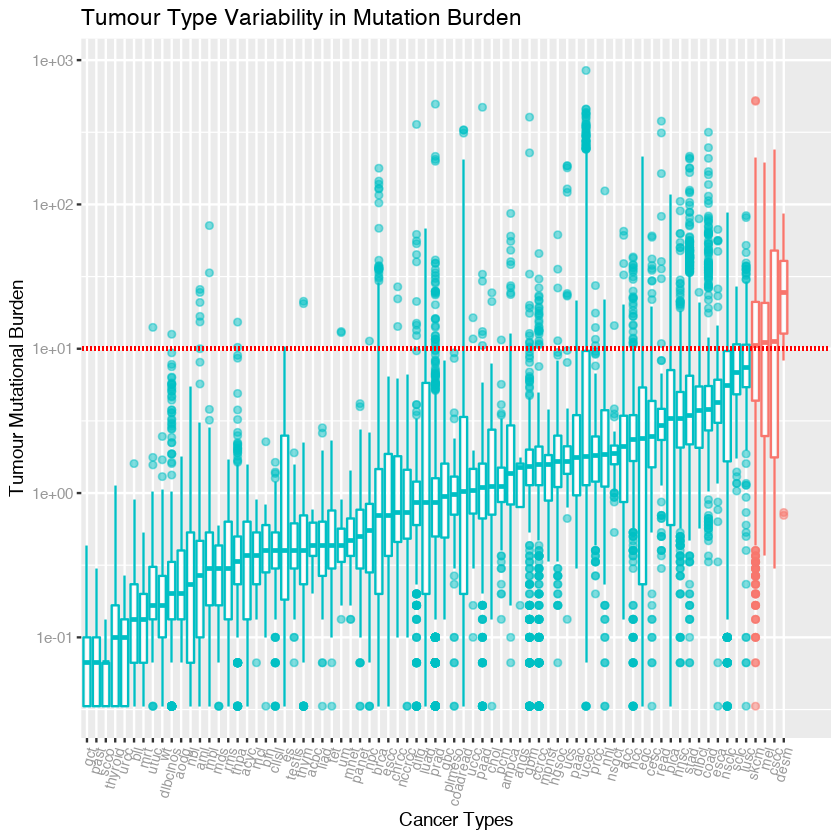

In [14]:
tmb_table %>% 
    filter(cancer_type != "breast") %>% 
    filter(cancer_type != "mixed") %>% 
    filter(cancer_type != "soft_tissue") %>% 
    ggplot(aes(x = cancer_type, y = TMB, colour = median < 10)) + geom_boxplot(alpha = 0.5) + scale_y_log10() +
    theme(axis.text.x = element_text(angle = 75, hjust = 1, size = 8, colour = "grey60"), axis.text.y = element_text(colour = "grey60")) + geom_segment(aes(x = 0.5, 
    y = 10, xend = 80, yend = 10), colour = "red", linetype = "dotted", size = 1) + theme(legend.position = "none") +
    #theme(panel.background = element_rect(fill = 'grey18'), panel.grid.major = element_line(colour = "grey18"))+
    #theme(axis.title.x = element_text(colour = "grey60"), axis.title.y = element_text(colour = "grey60")) + 
    labs(x = "Cancer Types", y = "Tumour Mutational Burden") + ggtitle("Tumour Type Variability in Mutation Burden") #+
    #theme(plot.background = element_rect(fill = 'grey18'))

#the commented out code formats the plot in a nice grey which I used for presenting